# PCA 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.load("../Data/LPS/control1_x.npy")

Explained variance ratio: [0.00332912 0.00250379 0.00161135 0.001503   0.00147068 0.00138098
 0.00136131 0.00133769 0.00132354 0.00130644]
Cumulative explained variance: [0.00332912 0.00583291 0.00744426 0.00894726 0.01041794 0.01179892
 0.01316022 0.01449791 0.01582145 0.01712789]


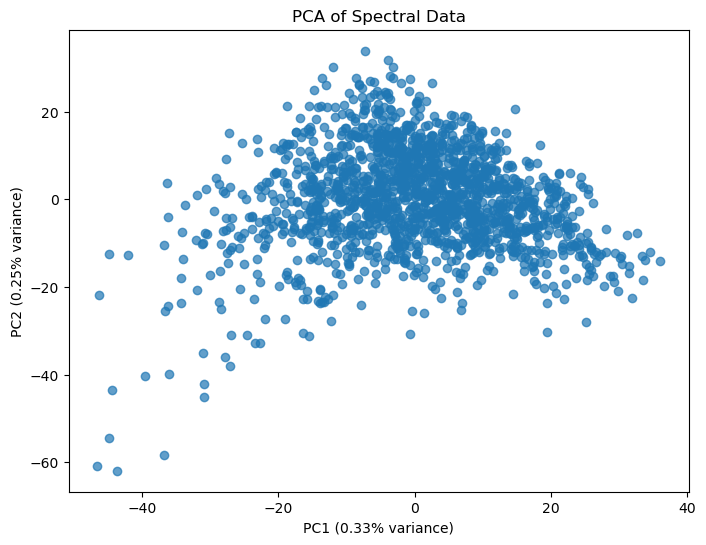

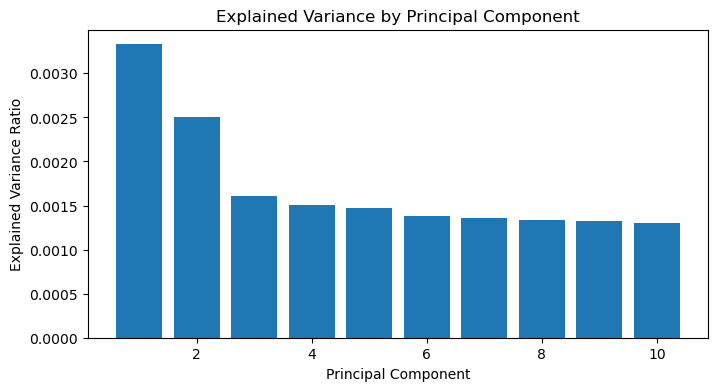

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
n_components = 10  # Choose number of components to keep
pca = PCA(n_components=n_components)
# pca.get_feature_names_out
X_pca = pca.fit_transform(X_scaled)

# View explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Cumulative explained variance: {np.cumsum(pca.explained_variance_ratio_)}")

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA of Spectral Data')
plt.show()

# Plot explained variance
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Component')
plt.show()